# <font color='#31394d'> Logistic Regression Practice Exercise </font>

For this exercise we are going to use the heart dataset to predict whether or not someone will get a heart attack. You can read more about the dataset here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease). The dataset is provided as a csv file in the `data` folder. 

🚀 <font color='#d9c4b1'> Exercise: </font> Start by reading in the dataset from the `data` folder and having a look at the data. Don't forget to import the necessary packages!

In [108]:
# Your code goes here!
# Hint: df = pd.read_csv('data/...')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
from pandas import read_csv
features = ['age','sex','cp','trestpbs','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','num']
path = r'C:\Users\HP\Desktop\KIDOLA\DATA SCIENCE\homework\homework\data\heart.csv'
heart1 = read_csv(path,names=features)
heart1.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,False
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,True
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,True
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,False


In [110]:
hearts = heart1.drop(heart1.index[0])
hearts.head(10)

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,False
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,True
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,True
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,False
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,False
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,False
7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,True
8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,False
9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,True
10,53,1,4,140,203,1,2,155,1,3.1,3,0.0,True


🚀 <font color='#d9c4b1'> Exercise: </font> Now standardize the features. You can learn more about standardization in the `Logistic Regression.ipynb` notebook that we used during the session!

In [111]:
hearts1=hearts.replace(to_replace=["False","True"], value=["0","1"])
print(hearts1)


    age sex cp trestpbs chol fbs restecg thalach exang oldpeak slope   ca num
1    63   1  1      145  233   1       2     150     0     2.3     3  0.0   0
2    67   1  4      160  286   0       2     108     1     1.5     2  3.0   1
3    67   1  4      120  229   0       2     129     1     2.6     2  2.0   1
4    37   1  3      130  250   0       0     187     0     3.5     3  0.0   0
5    41   0  2      130  204   0       2     172     0     1.4     1  0.0   0
..   ..  .. ..      ...  ...  ..     ...     ...   ...     ...   ...  ...  ..
295  57   0  4      140  241   0       0     123     1     0.2     2  0.0   1
296  45   1  1      110  264   0       0     132     0     1.2     2  0.0   1
297  68   1  4      144  193   1       0     141     0     3.4     2  2.0   1
298  57   1  4      130  131   0       0     115     1     1.2     2  1.0   1
299  57   0  2      130  236   0       2     174     0     0.0     2  1.0   1

[299 rows x 13 columns]


In [112]:
# Your code goes here!
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array =hearts1.values

heart_scaler = StandardScaler().fit(array)
heart_rescaled = heart_scaler.transform(array)

In [113]:
set_printoptions(precision=2)
print ("\nRescaled data:\n", heart_rescaled [0:5])


Rescaled data:
 [[ 0.94  0.69 -2.25  0.75 -0.27  2.41  1.01  0.02 -0.7   1.07  2.27 -0.72
  -0.93]
 [ 1.38  0.69  0.87  1.6   0.75 -0.42  1.01 -1.81  1.43  0.39  0.65  2.49
   1.08]
 [ 1.38  0.69  0.87 -0.66 -0.35 -0.42  1.01 -0.89  1.43  1.33  0.65  1.42
   1.08]
 [-1.95  0.69 -0.17 -0.09  0.06 -0.42 -1.    1.64 -0.7   2.11  2.27 -0.72
  -0.93]
 [-1.5  -1.44 -1.21 -0.09 -0.83 -0.42  1.01  0.98 -0.7   0.3  -0.98 -0.72
  -0.93]]


🚀 <font color='#d9c4b1'> Exercise: </font> Fit a standard logistic regression model and determine which features look most promising.

In [114]:
# Your code goes here!
import matplotlib.pyplot as plt
from sklearn import datasets

In [69]:
hearts1.num

1      0
2      1
3      1
4      0
5      0
      ..
295    1
296    1
297    1
298    1
299    1
Name: num, Length: 299, dtype: object

In [115]:
pd.Series(hearts1["num"]).value_counts(normalize=True).sort_index()

0    0.538462
1    0.461538
Name: num, dtype: float64

From the dataset, 46% of the recorded patients suffer from heart disease

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hearts1.iloc[:,:-1], hearts1.num, test_size=0.3, random_state=1)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X=X_train, y=y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

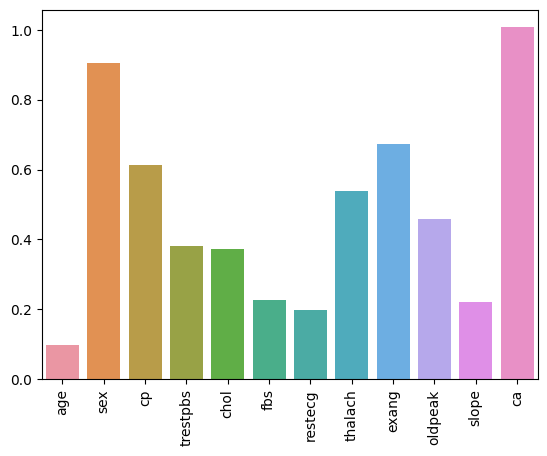

In [74]:

sns.barplot(x=hearts1.columns[:-1], y=np.abs(model.coef_[0]))
plt.xticks(rotation=90);

In [118]:
y_pred = model.predict(X_test)
y_pred[:15]

array(['1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '1'], dtype=object)

In [119]:
hearts2 = hearts1.drop(['age','trestpbs','fbs','restecg','slope'],axis=1,inplace=True)

In [120]:
hearts2 = hearts1

In [101]:
print(hearts2)

    sex cp chol thalach exang oldpeak   ca num
1     1  1  233     150     0     2.3  0.0   0
2     1  4  286     108     1     1.5  3.0   1
3     1  4  229     129     1     2.6  2.0   1
4     1  3  250     187     0     3.5  0.0   0
5     0  2  204     172     0     1.4  0.0   0
..   .. ..  ...     ...   ...     ...  ...  ..
295   0  4  241     123     1     0.2  0.0   1
296   1  1  264     132     0     1.2  0.0   1
297   1  4  193     141     0     3.4  2.0   1
298   1  4  131     115     1     1.2  1.0   1
299   0  2  236     174     0     0.0  1.0   1

[299 rows x 8 columns]


🚀 <font color='#d9c4b1'> Exercise: </font> Fit another model that includes only the features that you think look promising. Use cross validation and the accuracy, precision, and recall scoring metrics to determine which model is best.

In [121]:
# Your code goes here!
model2 = LogisticRegression()

In [122]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(hearts2.iloc[:,:-1], hearts2.num, test_size=0.3, random_state=1)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X1_train = scaler.fit_transform(X_train)

X1_test = scaler.transform(X_test)

In [124]:
model2.fit(X=X1_train, y=y1_train)

LogisticRegression()

In [125]:
y1_pred = model.predict(X1_test)
y1_pred[:15]

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '1', '0'], dtype=object)

Let's do models evaluation

In [126]:
#for Model1
from sklearn.metrics import confusion_matrix 


C = confusion_matrix(y_test, y_pred)


pd.DataFrame(C, index=['actual0','actual1'], columns=['pred0','pred1'])



,pred0,pred1
actual0,42,7
actual1,11,30


In [127]:
 C1 = confusion_matrix(y1_test, y1_pred)


pd.DataFrame(C1, index=['actual0','actual1'], columns=['pred0','pred1'])



,pred0,pred1
actual0,39,10
actual1,9,32


From above confusion metrics , we can observe that the first model (model1) predicetd 72 correct predictions and model2 predict 71 correct predictions

In [128]:
#for Model 1
(C[0,0]+C[1,1])/C.sum()

0.8

In [129]:
#For Model 2
(C1[0,0]+C1[1,1])/C1.sum()

0.7888888888888889

Model1 is slightly better than model two 